# *Import Library and Dataset*

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Data/Posisi_gaji .csv')
dataset.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# *Pick Feature with var X(independent) and y(dependent) in one column*

In [106]:
# Level label for X and Gaji for y
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# show value from those variable
print(f'X: \n {X} \n\n y: \n {y}')

X: 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

 y: 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# *Feature Scaling*

In [107]:
from sklearn.preprocessing import StandardScaler
# make 2 object for X and y scaler process
sc_X = StandardScaler()
sc_y = StandardScaler()
# fit and transform X and y
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))
y = y.ravel()
# show variable after scaling process
print(f'X: \n {X} \n\n y: \n {y}')

X: 
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

 y: 
 [-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


# *Dataset Fitting or Training process*

In [108]:
from sklearn.svm import SVR
# using kernel RBF(Radial Basis Function)
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR()

# *Visualization SVR result*

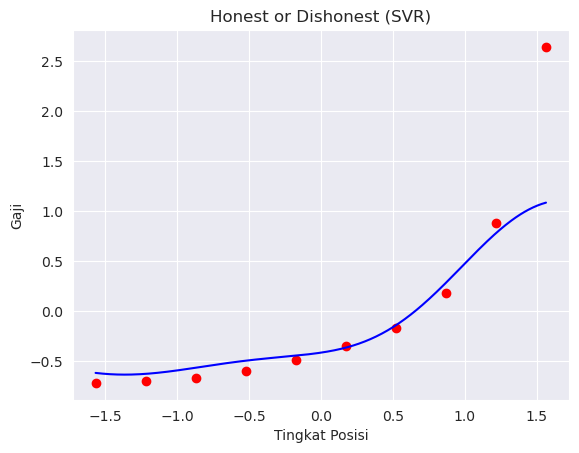

In [109]:
# create high resolution and more soft curve
X_grid = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)
# create scatter for data(with ball shape) and plot(regression line)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
# create title and label for X and y variable
plt.title('Honest or Dishonest (SVR)')
plt.xlabel('Tingkat Posisi')
plt.ylabel('Gaji')
# show result
plt.show()

# *Prediction result*

Create a 2D array containing the level of positions to be predicted.  In this example, the 'Tingkat Posisi' is 6.5.
- Scaling prediction features using sc_X.transform.
- Make predictions using the trained SVR model.
- Returns prediction results to their original scale using sc_.inverse_transform. 

In [110]:
# create 2D array with 'Tingkat Posisi' that will be predicted
prediction_tingkat_posisi = np.array([[6.5]])
# Feature scaling for predicted data
prediction_tingkat_posisi = sc_X.transform(prediction_tingkat_posisi)
# prediction process with SVR Model
prediction_gaji = regressor.predict(prediction_tingkat_posisi)
# return prediction result to original scaling
prediction_gaji = sc_y.inverse_transform(prediction_gaji.reshape(-1, 1))
# show prediction result
print(f"Predication for 'Gaji' for 'Tingkat Posisi' 6.5: {prediction_gaji}")

Predication for 'Gaji' for 'Tingkat Posisi' 6.5: [[170370.0204065]]


# *Result Validation*

The output result in *Visualization SVR result* is a graph from the Support Vector Regression (SVR) model which has been trained to predict 'Gaji' based on 'Tingkat Posisi'.  

This graph is a visualization of the relationship between 'Tingkat Posisi' (x-axis) and 'Gaji' (y-axis) after applying the SVR model.

SVR Chart:

- In the graph, the red dots represent the original observation data used to train the model.
- The blue line is the result of the SVR model prediction. This line attempts to follow the original data pattern as best as possible and is a representation of the non-linear relationship between position level and salary.

The prediction results displayed are 'Gaji' predictions for 'Tingkat Posisi' 6.5.The result is approximately 170,370.02 dollar This means the SVR model estimates that someone with a 'Tingkat Posisi' of 6.5 would have a 'Gaji' of approximately 170,370.02 dollar based on the relationship patterns found in the practice data.

This graph visualizes how the SVR model tries to fit the existing data and provide appropriate predictions based on a given 'Tingkat Posisi' (6.5 in this case).  In practice, you can use this model to make 'Gaji' predictions based on other 'Tingkat Posisi' by substituting the predicted_tingkat_posisi value. 

# *SVR Model Evaluation*

## *Check with Mean Absolute Error(MAE), Mean Squared Error(MSE), Root Mean Squared Error(RMSE) and R-Squared*

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_actual = y
y_pred = regressor.predict(X)

# with MAE
mae = mean_absolute_error(y_actual, y_pred)
# with MSE
mse = mean_squared_error(y_actual, y_pred)
# with MSE
rmse = np.sqrt(mse)
# with R-Squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-Squared: 0.7516001070620798
